In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# pm1 y pm2 en minutos (puede tener decimales)
pm1 = 593
pm2 = 641

In [3]:
the_path = os.getcwd()
data_path = os.path.join(the_path, '../data/processed-data/')
file_name = 'BTC-USDT-processed.csv'
file_path = data_path + file_name
df = pd.read_csv(file_path, index_col='Date')

In [4]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,Average
Date,
2018-02-23 03:39:00,10299.95
2018-02-23 03:40:00,10899.90
2018-02-23 03:41:00,10899.90
2018-02-23 03:42:00,10899.90
2018-02-23 03:43:00,10899.90


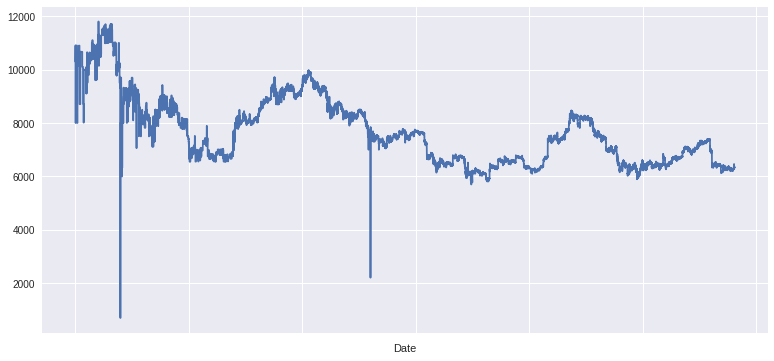

In [5]:
df['Average'].plot(figsize=(13,6))

In [6]:
# getting just last 6 months
df.index = pd.to_datetime(df.index)
df_M = df.last('120H').copy()
df_M.head(5)

,Average
Date,
2018-09-07 23:44:00,6403.20
2018-09-07 23:45:00,6406.00
2018-09-07 23:46:00,6402.00
2018-09-07 23:47:00,6408.15
2018-09-07 23:48:00,6403.30


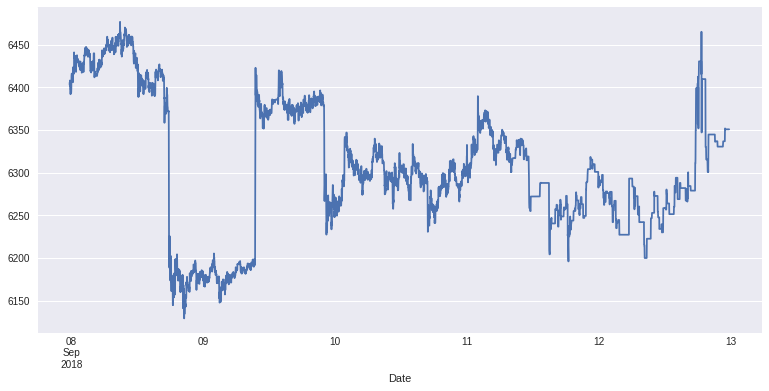

In [7]:
df_M['Average'].plot(figsize=(13,6))

In [8]:
df_M['PM1'] = df_M['Average'].rolling(pm1).mean()
df_M['PM2'] = df_M['Average'].rolling(pm2).mean()
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2
Date,,,
2018-09-08 10:24:00,6449.2,6439.479764,6437.143838
2018-09-08 10:25:00,6457.6,6439.507589,6437.228705
2018-09-08 10:26:00,6452.0,6439.534907,6437.300468
2018-09-08 10:27:00,6461.3,6439.577909,6437.392980
2018-09-08 10:28:00,6459.8,6439.620573,6437.473557


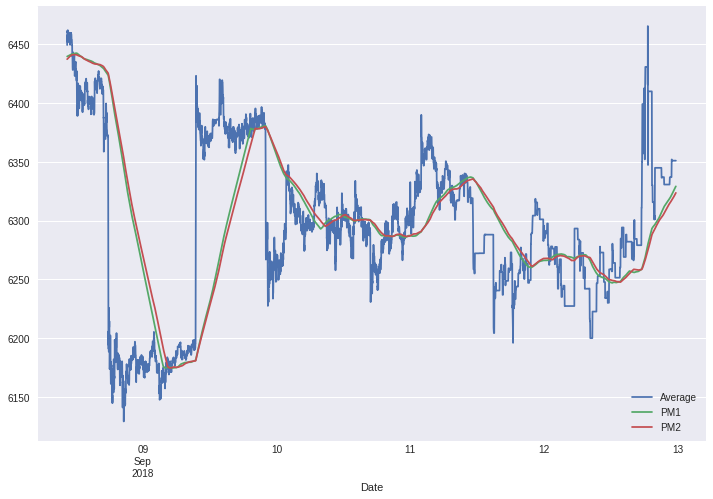

In [9]:
df_M.plot(figsize=(12,8))

In [10]:
df_M['Posicion'] = np.where(df_M['PM1'] > df_M['PM2'], 1, -1)

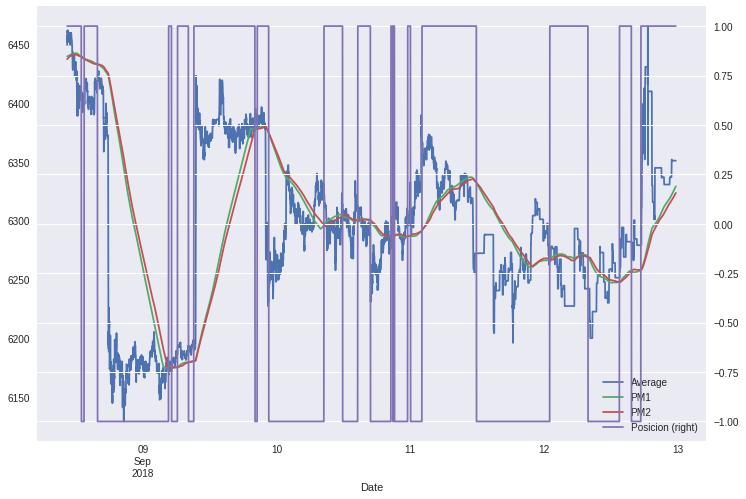

In [11]:
df_M.plot(figsize=(12,8), secondary_y = 'Posicion')

In [12]:
df_M['Retornos'] = np.log(df_M['Average']/df_M['Average'].shift(1))

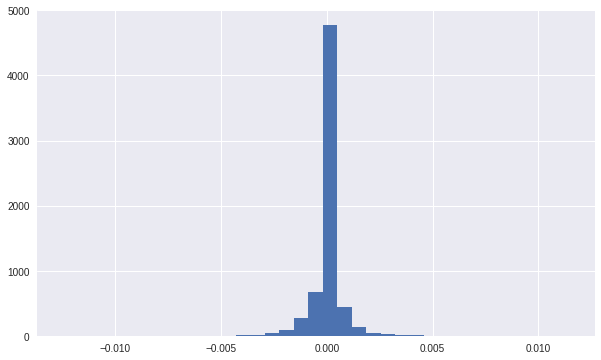

In [13]:
df_M['Retornos'].hist(bins=35, figsize=(10,6));

In [14]:
df_M.dropna(inplace = True)
df_M['Estrategia'] = df_M['Retornos']* df_M['Posicion'].shift(1)
df_M.dropna(inplace = True)
df_M.head()

,Average,PM1,PM2,Posicion,Retornos,Estrategia
Date,,,,,,
2018-09-08 10:26:00,6452.0,6439.534907,6437.300468,1,-0.000868,-0.000868
2018-09-08 10:27:00,6461.3,6439.577909,6437.392980,1,0.001440,0.001440
2018-09-08 10:28:00,6459.8,6439.620573,6437.473557,1,-0.000232,-0.000232
2018-09-08 10:29:00,6459.8,6439.663238,6437.561700,1,0.000000,0.000000
2018-09-08 10:30:00,6461.8,6439.710624,6437.652964,1,0.000310,0.000310


In [15]:
df_M['Retacum'] = df_M['Retornos'].cumsum().apply(np.exp)
df_M['Estracum'] = df_M['Estrategia'].cumsum().apply(np.exp)
df_M.tail()

,Average,PM1,PM2,Posicion,Retornos,Estrategia,Retacum,Estracum
Date,,,,,,,,
2018-09-12 23:39:00,6350.9,6328.593971,6322.908463,1,0.0,0.0,0.983477,1.01303
2018-09-12 23:40:00,6350.9,6328.716821,6323.063690,1,0.0,0.0,0.983477,1.01303
2018-09-12 23:41:00,6350.9,6328.828626,6323.218916,1,0.0,0.0,0.983477,1.01303
2018-09-12 23:42:00,6350.9,6328.940261,6323.374142,1,0.0,0.0,0.983477,1.01303
2018-09-12 23:43:00,6350.9,6329.051897,6323.529368,1,0.0,0.0,0.983477,1.01303


([], <a list of 0 Text xticklabel objects>)

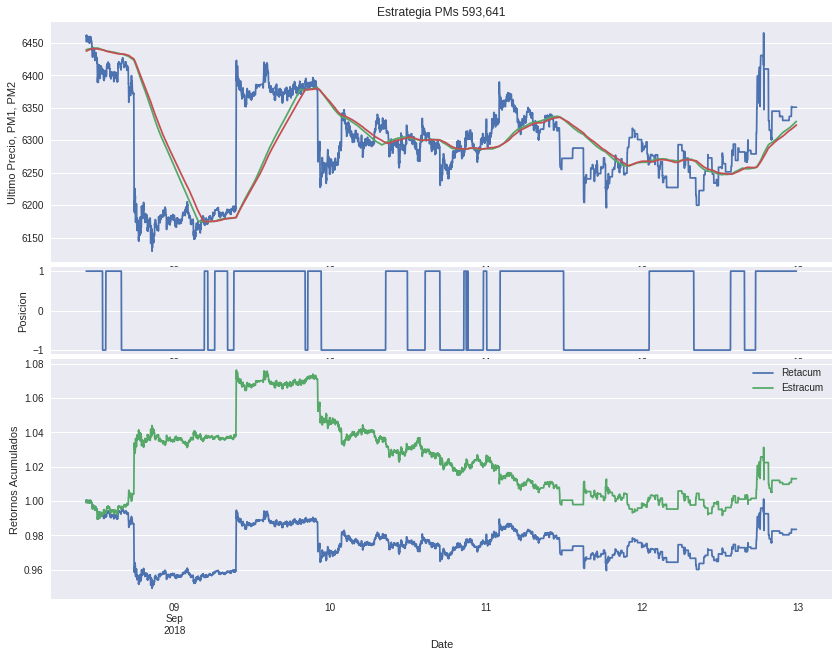

In [16]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((25,1),(0,0),rowspan = 8, colspan = 1)
df_M['Average'].plot(title = ('Estrategia PMs ' + str(pm1) + ',' + str(pm2)))
df_M['PM1'].plot(ax=ax1)
df_M['PM2'].plot(ax=ax1)

ax1.set_ylabel('Ultimo Precio, PM1, PM2')
plt.xticks([],[])

ax2 = plt.subplot2grid((25,1),(8,0), rowspan = 3, colspan = 1)
df_M['Posicion'].plot(ylim=[-1.1,1.1])
ax2.set_ylabel('Posicion')
plt.xticks([],[])

ax3=plt.subplot2grid((25,1),(11,0),rowspan = 8, colspan = 1)
df_M[['Retacum', 'Estracum']].plot(ax = ax3)
ax3.set_ylabel('Retornos Acumulados')
plt.xticks([],[])